In [267]:
import matplotlib.pyplot as plt
import matplotlib.patches as ptch
import helper_functions as hlp


from constants import *
from main import joint_post_astro, joint_post_rv

import giant_class as gc
import giant_class_random as gcr
import giant_class_random_loop as gcrl
import scipy as sp

In [ ]:
grid_num = 30
tick_num = 6
    
a_lim = (1.9, 5e1)
m_lim = (1.5, 2e2)

linewidth = 4
tick_size = 30
label_size = 36
title_size = 38
region_label_size = 40
restricted_region_label_size = 30

tick_array = np.linspace(0, grid_num-1, tick_num+1).astype(int)


a_list = np.logspace(np.log10(a_lim[0]), np.log10(a_lim[1]), grid_num)
m_list = np.logspace(np.log10(m_lim[0]), np.log10(m_lim[1]), grid_num)

###########################################################
min_index_m = hlp.value2index(min_m, (0, grid_num-1), m_lim)
min_index_a = hlp.value2index(min_a, (0, grid_num-1), a_lim)

print('Index: ', min_index_a, min_index_m)
print('Corresp. Value: ', hlp.index2value(min_index_a, (0, grid_num-1), a_lim), hlp.index2value(min_index_m, (0, grid_num-1), m_lim))


prior_grid = np.zeros((grid_num, grid_num))
prior_grid[min_index_m:, min_index_a:] = 1
###########################################################

hd191939 = ['HD191939', 0.807, 0.114, 0.006, -6e-5, 1.9e-5, 18.62, 0.1187, 0.0961]
my_planet = gcrl.Giant(*hd191939)
# my_planet2 = gc.Giant(*hd191939)
my_planet.make_arrays(a_lim = a_lim, m_lim = m_lim, grid_num = grid_num, num_points = int(1e7))
# my_planet1.make_arrays(a_lim = a_lim, m_lim = m_lim, grid_num = grid_num, nu_num=100)
# my_planet2.make_arrays(a_lim = a_lim, m_lim = m_lim, grid_num = grid_num, nu_num=5)
print('made the arrays')


post_rv_raw = my_planet.rv_post()
post_rv = (post_rv_raw*prior_grid)/((post_rv_raw*prior_grid).sum())

print('made rv post')

post_astro_raw = my_planet.astro_post()
post_astro = (post_astro_raw*prior_grid)/((post_astro_raw*prior_grid).sum())
print('made astro post')


post_tot_raw = my_planet.rv_astro_post()
post_tot = (post_tot_raw*prior_grid)/((post_tot_raw*prior_grid).sum())

In [ ]:
grid_num = 30
tick_num = 6
    
a_lim = (1.9, 5e1)
m_lim = (1.5, 2e2)

linewidth = 4
tick_size = 30
label_size = 36
title_size = 38
region_label_size = 40
restricted_region_label_size = 30

tick_array = np.linspace(0, grid_num-1, tick_num+1).astype(int)


a_list = np.logspace(np.log10(a_lim[0]), np.log10(a_lim[1]), grid_num)
m_list = np.logspace(np.log10(m_lim[0]), np.log10(m_lim[1]), grid_num)

###########################################################
min_index_m = hlp.value2index(min_m, (0, grid_num-1), m_lim)
min_index_a = hlp.value2index(min_a, (0, grid_num-1), a_lim)

print('Index: ', min_index_a, min_index_m)
print('Corresp. Value: ', hlp.index2value(min_index_a, (0, grid_num-1), a_lim), hlp.index2value(min_index_m, (0, grid_num-1), m_lim))


prior_grid = np.zeros((grid_num, grid_num))
prior_grid[min_index_m:, min_index_a:] = 1
###########################################################

hd191939 = ['HD191939', 0.807, 0.114, 0.006, -6e-5, 1.9e-5, 18.62, 0.1187, 0.0961]
my_planet = gcrl.Giant(*hd191939)
# my_planet2 = gc.Giant(*hd191939)
my_planet.make_arrays(a_lim = a_lim, m_lim = m_lim, grid_num = grid_num, num_points = int(1e7))
# my_planet1.make_arrays(a_lim = a_lim, m_lim = m_lim, grid_num = grid_num, nu_num=100)
# my_planet2.make_arrays(a_lim = a_lim, m_lim = m_lim, grid_num = grid_num, nu_num=5)
print('made the arrays')


post_rv_raw = my_planet.rv_post()
post_rv = (post_rv_raw*prior_grid)/((post_rv_raw*prior_grid).sum())

print('made rv post')

post_astro_raw = my_planet.astro_post()
post_astro = (post_astro_raw*prior_grid)/((post_astro_raw*prior_grid).sum())
print('made astro post')


post_tot_raw = my_planet.rv_astro_post()
post_tot = (post_tot_raw*prior_grid)/((post_tot_raw*prior_grid).sum())


In [248]:
prior_grid = np.zeros((grid_num, grid_num))
prior_grid[min_index_m:, min_index_a:] = 1
# prior_grid[0:, 0:] = 1
post_rv = (post_rv_raw*prior_grid)/((post_rv_raw*prior_grid).sum())
post_astro = (post_astro_raw*prior_grid)/((post_astro_raw*prior_grid).sum())
post_tot = (post_tot_raw*prior_grid)/((post_tot_raw*prior_grid).sum())

# post_astro[:, 1] = [2e-3 for i in range(grid_num)]
# post_rv[:, 2] = [5e-3 for i in range(grid_num)]

3.2816902411196454 10.0118785284982
2.8508749820069976 44.72135575629402
2
1


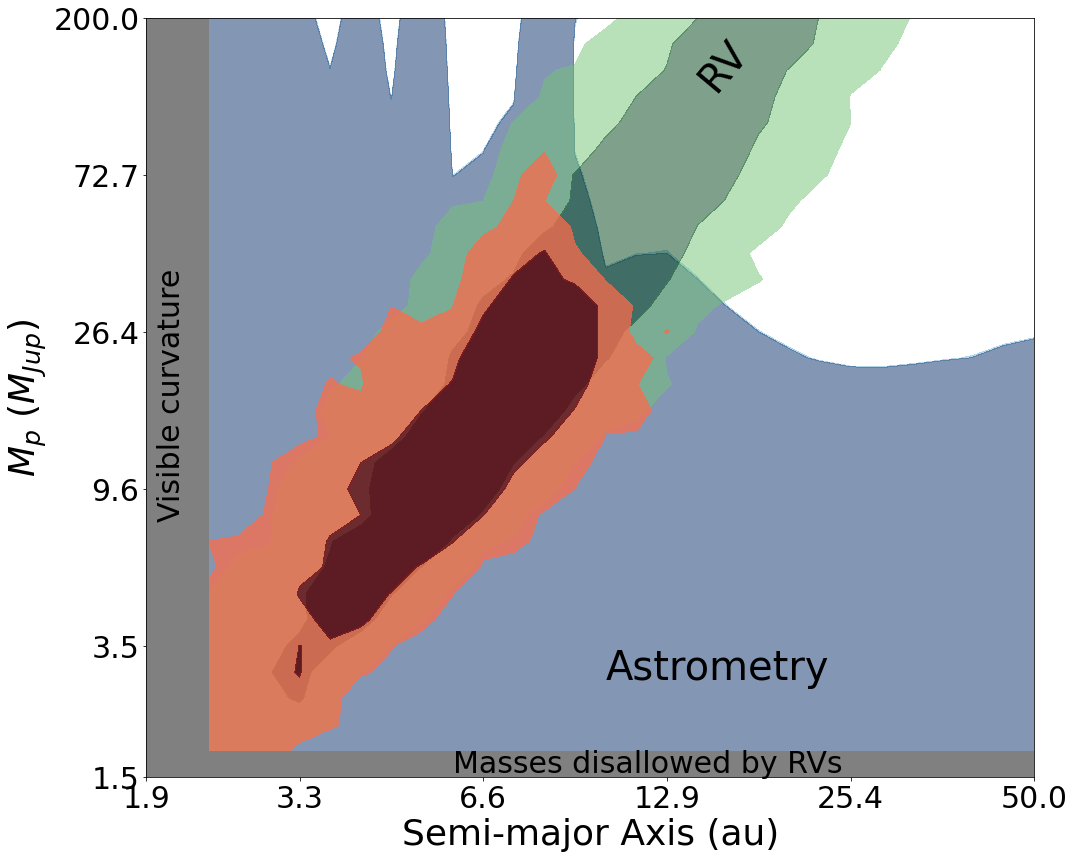

In [678]:
t_contours_astro = hlp.contour_levels(post_astro, [3])
t_contours_rv = hlp.contour_levels(post_rv, [1,2])
t_contours_tot = hlp.contour_levels(post_tot, [1,2])

##################################################
fig, ax = plt.subplots(figsize=(15,12))

post_astro_plot = ax.contourf(post_astro, t_contours_astro, cmap='Blues', extend='max', alpha=0.5)
post_rv_plot = ax.contourf(post_rv, t_contours_rv, cmap='Greens', extend='max', alpha=0.5)
post_tot_plot = ax.contourf(post_tot, t_contours_tot, cmap='Reds', extend='max', alpha=0.75)

# seg_list_1sig = post_tot_plot.allsegs[1][0]
# List of segments corresponding to 1-sigma contour (actually to the lowest sigma value given in t_contours_tot, 
# usually 1).
# Index explanation: -1 to get the tightest contour. Then if that contour is broken, I need to get the farthest-left 
# point of the farthest-left chunk, and the farthest-right point of the farthest-right chunk. My assumption is that 
# contour lists its contours as [left-most, middle, right-most], or even the reverse of that, they just need to not 
# be jumbled. Under this assumption, I take the 0th block for the min value, and for the max I take the -1th block. 
# Finally I transpose to go from [(x,y), (x,y), ...] to [(x,x, ...), (y,y, ...)], and take x for the a index and y 
# for the mass.

min_a_index_1sig = np.min(post_tot_plot.allsegs[-1][0].T[0])
max_a_index_1sig = np.max(post_tot_plot.allsegs[-1][-1].T[0])

min_m_index_1sig = np.min(post_tot_plot.allsegs[-1][0].T[1])
max_m_index_1sig = np.max(post_tot_plot.allsegs[-1][-1].T[1])

# seg_list_1sig = post_tot_plot.allsegs[-1][0]
# min_a_index_1sig = np.min(seg_list_1sig.transpose()[0])
# max_a_index_1sig = np.max(seg_list_1sig.transpose()[0])

# min_m_index_1sig = np.min(seg_list_1sig.transpose()[1])
# max_m_index_1sig = np.max(seg_list_1sig.transpose()[1])

min_a_1sig = hlp.index2value(min_a_index_1sig, (0, grid_num-1), a_lim)
max_a_1sig = hlp.index2value(max_a_index_1sig, (0, grid_num-1), a_lim)
min_m_1sig = hlp.index2value(min_m_index_1sig, (0, grid_num-1), m_lim)
max_m_1sig = hlp.index2value(max_m_index_1sig, (0, grid_num-1), m_lim)

print(min_a_1sig, max_a_1sig)
print(min_m_1sig, max_m_1sig)

print(min_index_a)
print(min_index_m)

mass_rect = ptch.Rectangle((0, 0), grid_num-1, min_index_m, color='gray', alpha=1.0)
a_rect = ptch.Rectangle((0, 0), min_index_a, grid_num-1, color='gray', alpha=1.0)

ax.add_patch(mass_rect)
ax.add_patch(a_rect)

########################################


plt.text((19/32)*grid_num, (7/8)*grid_num, 'RV', size=region_label_size, rotation=50)
plt.text((1/2)*grid_num, (1/8)*grid_num, 'Astrometry', size=region_label_size)

plt.text((1/3)*grid_num, (1/6)*(min_index_m), 'Masses disallowed by RVs', size=restricted_region_label_size)
plt.text((1/3)*(min_index_a-1), (1/3)*grid_num, 'Visible curvature', size=restricted_region_label_size, rotation=90)

plt.xticks(tick_array, [np.round(a_list[i], 1) for i in tick_array], size=tick_size)
plt.yticks(tick_array, [np.round(m_list[i], 1) for i in tick_array ], size=tick_size)
ax.set_xlabel('Semi-major Axis (au)', size=label_size)
ax.set_ylabel(r'$M_p$ ($M_{Jup}$)', size=label_size)
# ax.set_title('RV and Astrometric Constraints', size=title_size)


fig.tight_layout()
fig.savefig('5thCompConstraints_RV_astr.jpeg', facecolor='w')

In [658]:
def index2value(index, index_space, value_space):
    """
    The axis values for a plotted array are just the array indices. I want to convert these to Msini and a values, and on a log
    scale. This function takes a single index from a linear index range, and converts it to a parameter value in log space.
    index_space and value_space are expected as tuples of the form (min_value, max_value). index is in the range of index_space.
    """
    index = np.array(index)
    
    min_index, max_index = index_space[0],  index_space[1]
    min_value, max_value = value_space[0], value_space[1]
    
    index_range = max_index - min_index
    log_value_range = np.log10(max_value) - np.log10(min_value)
    
    # Convert from a linear space of indices to a linear space of log(values).
    log_value = (index-min_index)*(log_value_range/index_range) + np.log10(min_value)
    
    value = np.around(10**(log_value), 2) # Round to 2 decimal places
    
    return value

def contour_levels_1D(prob_list, sig_list, t_num = 1e3):
    """
    Contour drawing method taken from https://stackoverflow.com/questions/37890550/python-plotting-percentile-contour-lines-of-a-probability-distribution
    This function takes a 2-D array of probabilities and returns a 1-D array of the probability values corresponding to 1-sigma and 2-sigma
    contours. In this case, the 1-sigma contour encloses 68% of the total probability. The array is expected to be normalized. sig_list is 
    a list containing any combination of the integers 1, 2, or 3 to indicate desired contours. For example, [1,3] will return the 1 and 3
    sigma contours.
    This function uses scipy.interpolate.interp1d.
    """
    

    # An array of probabilites from 0 to prob_max in rate_array
    t = np.linspace(0, prob_list.max(), int(t_num))

    # integral is a 1D array of floats. The ith float is the sum of all probabilities in prob_array greater than the ith probability in t
    
    integral = ((prob_list >= t[:, None])*prob_list).sum(axis=(1))

    # Now create a function that takes integral as the x (not the y) and then returns the corresponding prob value from the t array. Interpolating between integral values allows me to choose any enclosed total prob. value (ie, integral value) and get the corresponding prob. value to use as my contour.
    f = sp.interpolate.interp1d(integral, t)
    
    contour_list = []
    prob_list = [0.68, 0.95, 0.997]
    
    for i in sig_list:
        contour_list.append(prob_list[i-1])
    
    # The plt.contourf function requires at least 2 levels. So if we want just one level, include a tiny contour that encompasses a small fraction of the total probability.
    if len(sig_list) == 1:
        contour_list.append(contour_list[0]-1e-4)
        # contour_list.append(1e-3)
    
    # Make sure list is in descending order
    t_contours = f(np.array(sorted(contour_list, reverse=True)))
   
    return t_contours


def bounds_1D(prob_array, value_spaces, interp_num = 1e4):
    """
    Given a 2D probability array, this function collapses the array along each axis to find the 68% confidence interval.
    
    value_spaces represents the parameter intervals covered by the array along each axis.
    It is expected in the form [(min_value1, max_value1), (min_value2, max_value2)], where 1 and 2 refer to the 0th and 1st axes.
    """
    bounds_list = []
    for i in range(2):
        
        array_1D = prob_array.sum(axis=i)
        grid_num = len(array_1D)
        
        sig1 = contour_levels_1D(array_1D, [2])[0]
        
        # Interpolate between the points to get a finer spacing of points. This allows for more precise parameter estimation.
        func = sp.interpolate.interp1d(range(grid_num), array_1D)
        
        # Array over the same interval, but spaced (probably) more finely
        fine_array = np.linspace(0, grid_num-1, int(interp_num))
        
        # This is analogous to the original array_1D, but finer
        interp_vals = func(fine_array)

        
        # This is a shaky step. I'm just looking for places where the function value is really close to the probability corresponding to 1-sigma. But from what I can tell, this will fall apart for multimodal distributions, and maybe in other cases too. I use the 'take' method to pick out the first and last indices.
        inds_1sig = np.where(abs(interp_vals - sig1) < 1e-2*sig1)[0].take((0,-1))
        print(inds_1sig)
        
        value_bounds = index2value(inds_1sig, (0, interp_num-1), value_spaces[::-1][i])
        
        bounds_list.append(value_bounds)
        
        ##############
        if i == 0:
            
            plt.plot(fine_array, interp_vals)
            plt.plot([fine_array[inds_1sig[0]], fine_array[inds_1sig[0]]], [0, .08])
            plt.plot([fine_array[inds_1sig[1]], fine_array[inds_1sig[1]]], [0, .08])
            plt.plot([0, grid_num], [sig1, sig1])
        ##############
        
    return bounds_list

[ 830 5134]
[ 887 6865]


[array([ 2.49, 10.19]), array([ 2.32, 43.15])]

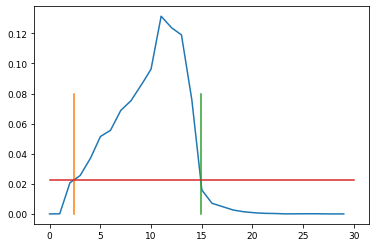

In [645]:
bounds_1D(post_tot, [m_lim, a_lim], interp_num = 1e4)

[2635 4853]
[3016 6102]


[array([4.5 , 9.29]), array([ 6.56, 29.71])]

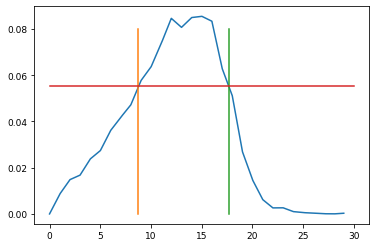

In [651]:
bounds_1D(post_tot, [m_lim, a_lim], interp_num = 1e4)

In [586]:
inds_1sig = np.where(abs(interp_vals - sig1) < 1e-2*sig1)[0].take((0,-1))

In [587]:
inds_1sig

array([3016, 6102])

In [668]:
limit_list = [a_lim, m_lim] # Mass is along the 0 axis

# label_list = [r'Mass $(M_{J})$', 'a (AU)']
# title_list = ['1-D Mass Probability', '1-D Semi-Major Axis Probability']

label_list = ['a (AU)', r'Mass $(M_{J})$']
title_list = ['1-D Semi-Major Axis Probability', '1-D Mass Probability']

ax = 0
lims = limit_list[ax]
label = label_list[ax]
title = title_list[ax]

arr = post_tot_raw.sum(axis = ax)
sig2, sig1 = contour_levels_1D(arr, [1, 2])
# plt.plot(range(30), post_tot_raw.sum(axis= ax))
# plt.plot(range(30), [sig2 for i in range(30)])


In [672]:
x

array([0.00000000e+00, 2.90029003e-03, 5.80058006e-03, ...,
       2.89941994e+01, 2.89970997e+01, 2.90000000e+01])

In [670]:
func = sp.interpolate.interp1d(range(30), arr)
interp_vals = func(x)
ind1, ind2 = np.where(abs(interp_vals - sig2) < 1e-2*sig2)[0].take((0,-1))

1-sigma interval is  [ 2.49 10.18] M_J


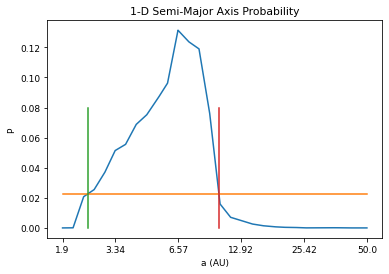

In [671]:
x = np.linspace(0, 29, 10000)
plt.plot(x, func(x))
plt.plot(range(30), [sig2 for i in range(30)])

ind1_scaled = ind1*(29/10000)
ind2_scaled = ind2*(29/10000) # Get these indices below!
plt.plot((ind1_scaled, ind1_scaled), (0, 0.08))
plt.plot((ind2_scaled, ind2_scaled), (0, 0.08))

tick_num = 6
tick_array = np.linspace(0, 30-1, tick_num).astype(int)
plt.xticks(tick_array, index2value(tick_array, (0, 29), lims))

plt.xlabel(label)
plt.ylabel('P')
plt.title(title)

print('1-sigma interval is ', index2value([ind1_scaled, ind2_scaled], (0,29), lims), 'M_J')

In [541]:
index2value(ind1_scaled, (0, 29), lims)

6.61

In [ ]:
index2value(17, range())

In [547]:
np.where(abs(interp_vals - sig2) < 1e-3*sig2)

(array([913, 914, 915, 916, 917, 918]),)

In [18]:
post_rv_1e7 = post_rv
post_astro_1e7 = post_astro
post_tot_1e7 = post_tot

In [52]:
post_rv_raw = post_rv_1e7
post_astro_raw = post_astro_1e7
post_tot_raw = post_tot_1e7

[1082 7519]
[1745 1771]


[array([ 2.71, 22.22]), array([3.52, 3.57])]

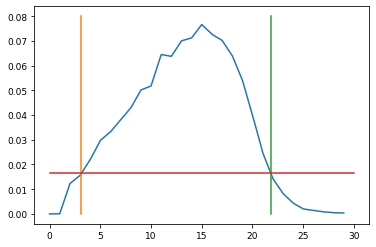

In [674]:
bounds_1D(post_rv, [m_lim, a_lim], interp_num = 1e4)

Text(0, 0.5, 'Mass')

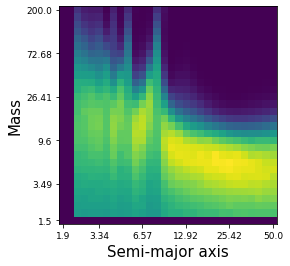

In [653]:
plt.imshow(post_astro, origin = 'lower')
plt.xlabel('Semi-major axis', size = 15)
plt.ylabel('Mass', size = 15)

tick_num = 6
tick_array = np.linspace(0, 30-1, tick_num).astype(int)
plt.xticks(tick_array, index2value(tick_array, (0, 29), limit_list[0]))
plt.yticks(tick_array, index2value(tick_array, (0, 29), limit_list[1]))

plt.xlabel('Semi-major axis')
plt.ylabel('Mass')